In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import glob
path = 'Renewable Energy Data/Andhra Pradesh'
all_files = glob.glob(path + "/*.csv")

#filename = '/home/data/BITS/BITS 3-1/Applied Stastical Methods/Assignment-2/Statistical-Analysis-and-Forecasting-of-Solar-Energy/Renewable Energy Data/Andhra Pradesh/34082_14.25_77.35_2000.csv'

li = []

for filename in all_files:
    df = pd.read_csv(filename,index_col=None, header=0,skiprows=2,usecols=[0,1,2,3,4,7])
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [3]:
frame['Date']=frame['Year'].astype(str) + frame['Month'].astype(str).str.zfill(2) + frame['Day'].astype(str).str.zfill(2) + frame['Hour'].astype(str).str.zfill(2)+frame['Minute'].astype(str)

frame['Date'] = pd.to_datetime(frame['Date'], format='%Y%m%d%H%M')

In [4]:
frame.head()

,Year,Month,Day,Hour,Minute,GHI,Date
0,2001,1,1,0,0,0,2001-01-01 00:00:00
1,2001,1,1,1,0,0,2001-01-01 01:00:00
2,2001,1,1,2,0,0,2001-01-01 02:00:00
3,2001,1,1,3,0,0,2001-01-01 03:00:00
4,2001,1,1,4,0,0,2001-01-01 04:00:00


In [5]:
import datetime as dt

df_all = frame[['Date','GHI']]
single = df_all['Date']

In [6]:
df_all.set_index('Date',inplace=True)

In [7]:
df_all = df_all.between_time('09:00','15:00')

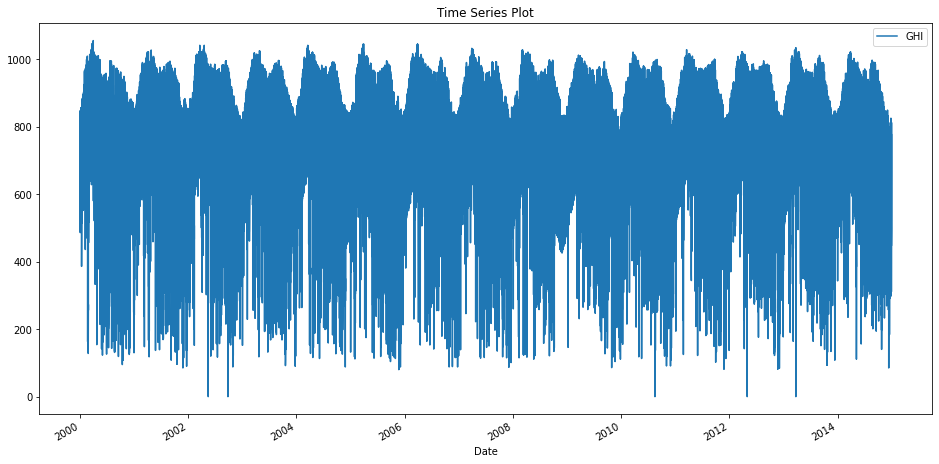

In [8]:
df_all.plot(figsize=[16,8],title='Time Series Plot')

In [9]:
import statsmodels.tsa.api as smtsa